In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### [연습문제 5-3]

- 대각합 연산과 유클리드 공식의 결과(프로베니우스 norm)가 동일하다는 것을 구현
- 대각합 공식은 A^TA에서만 동작? 아니면 AA^T에서도 결과가 동일?

In [2]:
A = np.array([[4,5,6],[0,1,4],[9,9,9]])

# 대각합
print(np.trace(A))

# 대각합 연산
n1 = np.sqrt(np.trace(A.T @ A))

# Frobenius norm
n2 = np.sqrt(np.sum(A**2))

print(n1)
print(n2)

14
18.35755975068582
18.35755975068582


#### [연습 문제 5-4]

- 행렬 이동이 행렬 norm에 미치는 영향 알아보기
- 먼저 10x10 난수 행렬을 만들고 프로베니우스 norm을 계산한다.
- 그런 다음 for 문 내부에 다음 단계를 코딩한다.
- (1) norm의 일부만큼 행렬을 이동하고,
- (2) 원래 행렬에서 norm의 변화율을 계산하고,
- (3) 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리를 계산하고,
- (4) 행렬의 원소 사이의 상관계수를 계산한다. (힌트 : np.flatten()을 사용해서 벡터화된 행렬의 상관관계를 계산)
- 이동시킬 값인 norm의 비율은 0에서 1 사이를 30개의 단계로 나누어 진행
- 루프의 각 반복에서는 이전 반복에서 이동된 행렬이 아닌 원래 행렬을 사용해야 함.

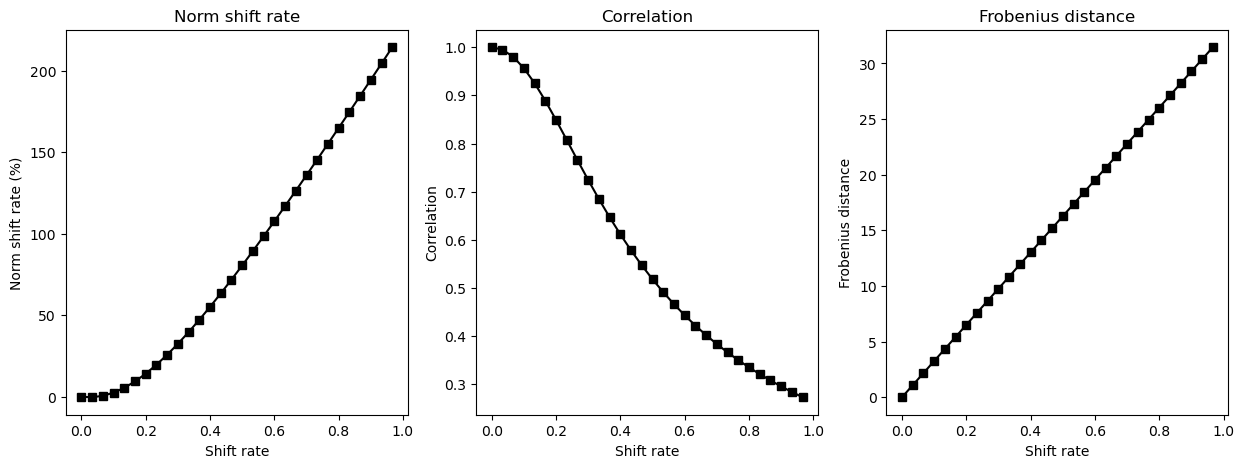

In [3]:
# 10x10 난수 행렬
M = np.random.randn(10,10)

# 프로베니우스 norm 계산
n1 = np.linalg.norm(M)

n1ShiftRate = np.zeros(30)
frobeniusDistance = np.zeros(30)
corr = np.zeros(30)

# 이동시킬 값인 norm의 비율은 0에서 1 사이를 30개의 단계로 나누어 진행
for i in range(30):
  # norm의 일부만큼 행렬 이동. 이동시킬 값인 norm의 비율은 0에서 1 사이를 30개의 단계로 나누어 진행
  MShift = M + n1 * np.eye(10) * i / 30
  # 원래 행렬에서 norm의 변화율 계산
  n1Shift = np.linalg.norm(MShift)
  n1ShiftRate[i] = 100 * (n1Shift - n1) / n1

  # 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리 계산
  frobeniusDistance[i] = np.linalg.norm(MShift - M)

  # 행렬의 원소 사이의 상관계수 계산
  corr[i] = np.corrcoef(M.flatten(), MShift.flatten())[0,1]

# 그래프 그리기 (가로로 그래프 3개 쭉 나타내기, x값은 0에서 1까지)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(np.arange(30)/30, n1ShiftRate, 'ks-')
plt.title('Norm shift rate')
plt.xlabel('Shift rate')
plt.ylabel('Norm shift rate (%)')
plt.subplot(1,3,2)
plt.plot(np.arange(30)/30, corr, 'ks-')
plt.title('Correlation')
plt.xlabel('Shift rate')
plt.ylabel('Correlation')
plt.subplot(1,3,3)
plt.plot(np.arange(30)/30, frobeniusDistance, 'ks-')
plt.title('Frobenius distance')
plt.xlabel('Shift rate')
plt.ylabel('Frobenius distance')

plt.show()



#### [연습문제 5-5]

- 임의의 계수를 가진 난수 행렬 만들기
- 계수가 r인 M x N 행렬을 만들려면 난수 M x r 행렬에 r x N 행렬을 곱한다.
- 파이썬에서 이를 구현하고 계수가 실제로 r인지 확인
- r > min{M,N}을 설정하면 어떻게 되고 그 이유는 무엇인가?

In [4]:
# M = 4, r = 3 , N = 5
M = 4
r = 3
N = 5

m1 = np.random.randn(M,r)
m2 = np.random.randn(r,N)

m3 = m1 @ m2

# m3의 계수가 r인지 확인
print(np.linalg.matrix_rank(m3))

3


In [5]:
# r > min{M,N}인 경우
M = 4
r = 5
N = 6

m1 = np.random.randn(M,r)
m2 = np.random.randn(r,N)

m3 = m1 @ m2

# m3의 계수가 r인지 확인
print(np.linalg.matrix_rank(m3))

4


#### [연습문제 5-6]

- 더한 결과가 (1) 계수-0, (2) 계수-1, (3) 계수-2가 되는 세 쌍의 계수-1 행렬을 만들어 행렬 계수(r(A+B) <= r(A) + r(B))의 덧셈 법칙 구현
- 그런 다음 덧셈 대신 행렬 곱셈에 대해서도 같은 문제 풀어보기

In [6]:
# 더한 결과가 계수-0인 경우
A1 = np.array([[1,0],[0,0]])
A2 = np.array([[-1,0],[0,0]])
A3 = A1 + A2

# 계수 확인
print(np.linalg.matrix_rank(A1))
print(np.linalg.matrix_rank(A2))
print(np.linalg.matrix_rank(A3))

1
1
0


In [7]:
# 더한 결과가 계수-1인 경우
A1 = np.array([[1,0],[0,0]])
A2 = np.array([[0,1],[0,0]])
A3 = A1 + A2

# 계수 확인
print(np.linalg.matrix_rank(A1))
print(np.linalg.matrix_rank(A2))
print(np.linalg.matrix_rank(A3))

1
1
1


In [8]:
# 더한 결과가 계수-2인 경우
A1 = np.array([[1,0],[0,0]])
A2 = np.array([[0,0],[0,1]])
A3 = A1 + A2

# 계수 확인
print(np.linalg.matrix_rank(A1))
print(np.linalg.matrix_rank(A2))
print(np.linalg.matrix_rank(A3))

1
1
2


In [9]:
# 곱한 결과가 계수-0인 경우
A1 = np.array([[1,0],[0,0]])
A2 = np.array([[0,0],[1,0]])
A3 = A1 @ A2

# 계수 확인
print(np.linalg.matrix_rank(A1))
print(np.linalg.matrix_rank(A2))
print(np.linalg.matrix_rank(A3))

1
1
0


In [10]:
# 곱한 결과가 계수-1인 경우
A1 = np.array([[1,0],[0,0]])
A2 = np.array([[1,0],[0,0]])
A3 = A1 @ A2

# 계수 확인
print(np.linalg.matrix_rank(A1))
print(np.linalg.matrix_rank(A2))
print(np.linalg.matrix_rank(A3))

1
1
1


In [11]:
# 곱한 결과가 계수 2인 경우 -> 불가능!

#### [연습문제 5-7]

- [연습문제 5-5]의 코드를 매개변수 M과 r을 입력으로 받아 계수-r인 MxM 난수 행렬을 출력하는 파이썬 함수에 넣는다.
- 이중 for 루프에서 2부터 15까지의 각 계수를 가지는 20x20 행렬 쌍을 만든다.
- 이 행렬들을 더한 결과 행렬의 계수와 곱한 결과 행렬의 계수를 저장한다.
- 이 계수를 행렬로 만들어서 개별 행렬의 계수 함수로 시각화 할 수 있다.

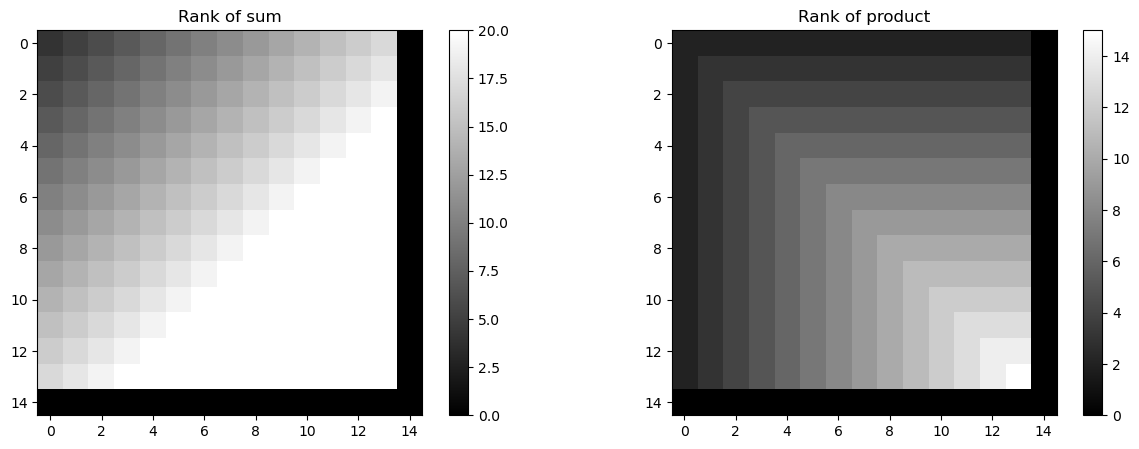

In [14]:
def func(M, r):
  return np.random.randn(M,r) @ np.random.randn(r,M)

# hap_rank, gob_rank 저장할 빈 행렬 생성
hap_ranks = np.zeros((15,15))
gob_ranks = np.zeros((15,15))
  
# 이중 for 루프에서 2부터 15까지의 각 계수를 가지는 20x20 행렬 쌍을 만든다.
for i in range(2,16):
  for j in range(2, 16):
    hap = func(20, i) + func(20, j)
    gob = func(20, i) @ func(20, j)

    hap_rank = np.linalg.matrix_rank(hap)
    gob_rank = np.linalg.matrix_rank(gob)

    hap_ranks[i-2, j-2] = hap_rank
    gob_ranks[i-2, j-2] = gob_rank

# 시각화
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(hap_ranks, cmap='gray')
plt.title('Rank of sum')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(gob_ranks, cmap='gray')
plt.title('Rank of product')
plt.colorbar()
plt.show()



#### [연습문제 5-8]

- 행렬 A, A^T, A^TA, AA^T의 계수는 모두 동일하다.
- 다양한 크기나 모양(정방, 높은, 넓은), 계수의 난수 행렬을 사용해 이를 구현하는 코드를 작성

In [15]:
# case 1
A = np.random.randn(3,3)

# case 2
B = np.random.randn(6,2)

# case 3
C = np.random.randn(3,6)

def func(A):
  m1 = A
  m2 = A.T
  m3 = A.T @ A
  m4 = A @ A.T

  r1 = np.linalg.matrix_rank(m1)
  r2 = np.linalg.matrix_rank(m2)
  r3 = np.linalg.matrix_rank(m3)
  r4 = np.linalg.matrix_rank(m4)

  return r1, r2, r3, r4

print(func(A))
print(func(B))
print(func(C))

(3, 3, 3, 3)
(2, 2, 2, 2)
(3, 3, 3, 3)


#### [연습문제 5-9]

- 이 문제의 목적은 v E C(A)의 답을 구하는 것
- 정규 분포에서 무작위로 추출한 숫자를 사용해 계수-3 행렬 A E R(4X3)과 벡터 v E R(4)를 만든다.
- 벡터가 행렬의 열공간에 있는지 여부 확인
- 코드를 여러번 실행해서 일관된 패턴을 보이는지 확인
- 그런 다음 A E R(4X4) 계수-4 행렬을 사용한다.
- 테스트 결과에 따라 True 또는 False를 반환하고 벡터 크기가 확장된 행렬과 일치하지 않을 때 예외를 발생시키는 함수에 이 코드를 넣어 보기.

In [33]:
A = np.random.randn(4,3)
v = np.random.randn(4,1)

def func(A,v):
  # v가 A의 열공간에 속하는지 확인
  r1 = np.linalg.matrix_rank(np.hstack([A,v])) == np.linalg.matrix_rank(A)

  # 벡터 크기가 확장된 행렬과 일치하지 않을 때
  if A.shape[0] != v.shape[0]:
    return Exception('The size of the vector does not match the size of the matrix')
  
  return r1

print(func(A,v))

False


In [36]:
A = np.random.randn(4,4)
v = np.random.randn(4,1)

def func(A,v):
  # v가 A의 열공간에 속하는지 확인
  r1 = np.linalg.matrix_rank(np.hstack([A,v])) == np.linalg.matrix_rank(A)

  # 벡터 크기가 확장된 행렬과 일치하지 않을 때
  if A.shape[0] != v.shape[0]:
    return Exception('The size of the vector does not match the size of the matrix')
  
  return r1

print(func(A,v))

True
